In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
file = "yeast_ath.csv"
df = pd.read_csv(file)
print("length of the file",len(df))

length of the file 1439


In [24]:
df.head()

,p1,p2,truth,prediction
0,A4GSN8,Q94F30,1,9.993395e-01
1,F4JL11,Q9C829,1,1.000000e+00
2,O04292,Q9LEZ3,1,1.476482e-05
3,O04294,Q9SSQ8,1,6.039081e-07
4,O04294,O80837,1,1.000000e+00


In [25]:
# transform to matrix
mat = {}
for i in range(len(df)):
    # add keys to the dictionary
    key = df['p1'][i]
    if key not in mat.keys():
        mat[key] = np.zeros(len(df)*2)
    key = df['p2'][i]
    if key not in mat.keys():
        mat[key] = np.zeros(len(df)*2)
        
    # add the prediction values
    mat[df['p1'][i]][list(mat).index(df['p2'][i])] = df['prediction'][i]
    mat[df['p2'][i]][list(mat).index(df['p1'][i])] = df['prediction'][i]

In [37]:
# print matrix
corr = pd.DataFrame(mat).corr()
corr.head()

,A4GSN8,Q94F30,F4JL11,Q9C829,O04292,Q9LEZ3,O04294,Q9SSQ8,O80837,Q2VWA2,...,Q8VZ58,Q9FG72,Q67YN2,Q9XGN1,Q9XHZ7,Q9XIN6,Q9ZSD4,Q9ZSR7,Q9ZUJ2,Q9LD45
A4GSN8,1.000000,-0.000724,-0.000985,-0.000853,-0.000613,-0.002146,0.108190,-0.000492,-0.000696,-0.001101,...,-0.000670,-0.000668,-0.000829,-0.001101,-0.000984,-0.000492,-0.000853,-0.000528,-0.000494,-0.000635
Q94F30,-0.000724,1.000000,-0.001023,-0.000886,-0.000638,-0.002231,0.005851,-0.000512,-0.000723,-0.001144,...,-0.000697,-0.000695,-0.000861,-0.001145,-0.001023,-0.000511,-0.000886,-0.000549,-0.000513,-0.000660
F4JL11,-0.000985,-0.001023,1.000000,-0.001205,-0.000819,0.113960,-0.004487,-0.000696,-0.000984,-0.001556,...,-0.000947,-0.000945,-0.001171,0.222404,-0.001391,-0.000696,0.576848,-0.000747,-0.000698,-0.000897
Q9C829,-0.000853,-0.000886,-0.001205,1.000000,-0.000732,0.132447,-0.003885,-0.000602,-0.000852,-0.001347,...,-0.000820,-0.000818,-0.001014,-0.001348,-0.001205,-0.000602,-0.001044,-0.000647,-0.000604,-0.000777
O04292,-0.000613,-0.000638,-0.000819,-0.000732,1.000000,-0.001867,-0.002795,-0.000433,-0.000613,-0.000969,...,-0.000590,-0.000588,-0.000730,0.000357,-0.000867,-0.000433,-0.000751,-0.000465,-0.000435,-0.000559


In [38]:
# OPTIONAL: SLICE THE MATRIX if too big
# corr = corr.iloc[:10,:10]

<AxesSubplot:>

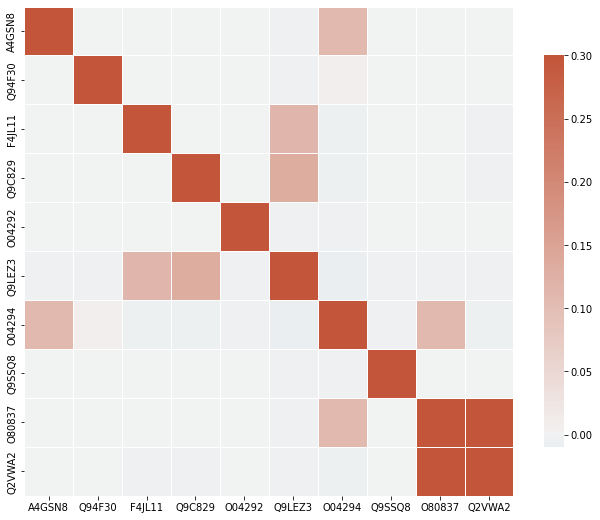

In [43]:
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})